In [33]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans

np.random.seed(5)

In [34]:
img_paths = []
for file in glob.glob("./1*/*.jpg"):
    img_paths.append(file)
# print("Image number:", len(img_paths))

In [35]:
print("Image number:", len(img_paths))

Image number: 868


(1232, 1754) : .\15991\img15991_000.jpg
(1232, 1754) : .\16108\img16108_024.jpg
(1232, 1754) : .\16137\img16137_002.jpg
(1232, 1754) : .\16143\img16143_023.jpg


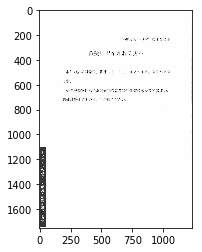

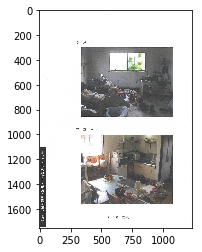

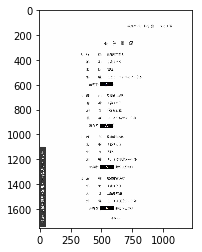

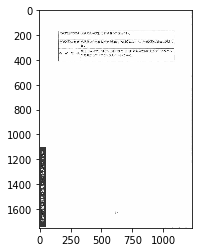

In [3]:
for i in img_paths[::248]:
    img = Image.open(i)
    print(img.size,":",i)
    plt.figure() 
    plt.imshow(np.asarray(img))

In [4]:
plt.close()

img_paths = img_paths[:600]
# print(len(img_paths))

def img_to_matrix(img):
    img_array = np.asarray(img)
    
    return img_array

def flatten_img(img_array):
    s = img_array.shape[0] * img_array.shape[1] * img_array.shape[2]
    img_width = img_array.reshape(1,s)
    
    return img_width[0]

dataset = []
for i in img_paths:
    img = Image.open(i)
    img = img.resize((int(1232/6), int(1754/6)), Image.BICUBIC)
    img = img_to_matrix(img)
    img = flatten_img(img)
    
    dataset.append(img)

dataset = np.array(dataset)
print(dataset.shape)
print("Dataset make done.")

(600, 179580)
Dataset make done.


In [5]:
dataset.shape

(600, 179580)

In [6]:
n = dataset.shape[0]
batch_size = 180
ipca = IncrementalPCA(n_components=100)

for i in range(n//batch_size):
    ipca.partial_fit(dataset[i*batch_size:(i+1)*batch_size])
    
r_dataset = ipca.transform(dataset)
print(r_dataset.shape)
print("PCA done.")

(600, 100)
PCA done.


In [7]:
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=5).fit(r_dataset)

label = kmeans.labels_
label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]
label2 = np.where(label==2)[0]
label3 = np.where(label==3)[0]
print("K-means clustering done.")

K-means clustering done.


In [32]:
# Image placing
if not os.path.exists("label0"):
    os.makedirs("label0")
for i in label0:
    img = Image.open(img_paths[i])
    fname = img_paths[i].split('\\')[-1]
    img.save('label0\\' + fname)

if not os.path.exists("label1"):
    os.makedirs("label1")
for i in label1:
    img = Image.open(img_paths[i])
    fname = img_paths[i].split('\\')[-1]
    img.save('label1\\' + fname)

if not os.path.exists("label2"):
    os.makedirs("label2")
for i in label2:
    img = Image.open(img_paths[i])
    fname = img_paths[i].split('\\')[-1]
    img.save('label2\\' + fname)

if not os.path.exists("label3"):
    os.makedirs("label3")
for i in label3:
    img = Image.open(img_paths[i])
    fname = img_paths[i].split('\\')[-1]
    img.save('label3\\' + fname)
    
print("Image placing done.")

Image placing done.


In [23]:
img_paths[:5]

['.\\15991\\img15991_000.jpg',
 '.\\15991\\img15991_001.jpg',
 '.\\15991\\img15991_002.jpg',
 '.\\15991\\img15991_003.jpg',
 '.\\15991\\img15991_004.jpg']

In [24]:
img_paths[0]

'.\\15991\\img15991_000.jpg'

In [26]:
print(img_paths[0])

.\15991\img15991_000.jpg


In [31]:
tmp = "01234567890123456789"
a = tmp.split('0')[-1]
print(a)

123456789
